### Homework 01 
Submitted by:
>1. Aishwarya Sarkar [as99646]
2. Anushka Iyer [ai6646]
3. Rochan Nehete [rrn479]
4. Ruchi Sharma [rs58898]
5. Vishwak Venkatesh [vv8257]

### Part A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [4]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [5]:
train.shape

(5500, 23)

In [6]:
# Check for nulls
train.isna().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

## Feature Engineering

In [7]:
# # Creating features as A/(B+1) (To handle denominator being 0 sometimes)
# train['follower_count_ratio'] = train['A_follower_count']/(train['B_follower_count']+1)
# train['following_count_ratio'] = train['A_following_count']/(train['B_following_count']+1)
# train['listed_count_ratio'] = train['A_listed_count']/(train['B_listed_count']+1)
# train['mentions_received_ratio'] = train['A_mentions_received']/(train['B_mentions_received']+1)
# train['retweets_received_ratio'] = train['A_retweets_received']/(train['B_retweets_received']+1)
# train['mentions_sent_ratio'] = train['A_mentions_sent']/(train['B_mentions_sent']+1)
# train['retweets_sent_ratio'] = train['A_retweets_sent']/(train['B_retweets_sent']+1)
# train['posts_ratio'] = train['A_posts']/(train['B_posts']+1)
# train['network_feature_1_ratio'] = train['A_network_feature_1']/(train['B_network_feature_1']+1)
# train['network_feature_2_ratio'] = train['A_network_feature_2']/(train['B_network_feature_2']+1)
# train['network_feature_3_ratio'] = train['A_network_feature_3']/(train['B_network_feature_3']+1)

In [8]:
# Creating features as A > B (Boolean)
train['follower_count_diff'] = (train['A_follower_count']>(train['B_follower_count']))
train['following_count_diff'] = (train['A_following_count']>(train['B_following_count']))
train['listed_count_diff'] = (train['A_listed_count']>(train['B_listed_count']))
train['mentions_received_diff'] = (train['A_mentions_received']>(train['B_mentions_received']))
train['retweets_received_diff'] = (train['A_retweets_received']>(train['B_retweets_received']))
train['mentions_sent_diff'] = (train['A_mentions_sent']>(train['B_mentions_sent']))
train['retweets_sent_diff'] = (train['A_retweets_sent']>(train['B_retweets_sent']))
train['posts_diff'] = (train['A_posts']>(train['B_posts']))
train['network_feature_1_diff'] = (train['A_network_feature_1']>(train['B_network_feature_1']))
train['network_feature_2_diff'] = (train['A_network_feature_2']>(train['B_network_feature_2']))
train['network_feature_3_diff'] = (train['A_network_feature_3']>(train['B_network_feature_3']))

In [9]:
# # Creating features as (A-B)/(A+B)
# train['follower_diffrat'] = ((train['A_follower_count'] - train['B_follower_count']) / (train['A_follower_count'] + train['B_follower_count']))
# train['following_diffrat'] = ((train['A_following_count'] - train['B_following_count']) / (train['A_following_count'] + train['B_following_count']))
# train['listed_diffrat'] = ((train['A_listed_count'] - train['B_listed_count']) / (train['A_listed_count'] + train['B_listed_count']))
# train['ment_rec_diffrat'] = ((train['A_mentions_received'] - train['B_mentions_received']) / (train['A_mentions_received'] + train['B_mentions_received']))
# train['rt_rec_diffrat'] = ((train['A_retweets_received'] - train['B_retweets_received']) / (train['A_retweets_received'] + train['B_retweets_received']))
# train['ment_sent_diffrat'] = ((train['A_mentions_sent'] - train['B_mentions_sent']) / (train['A_mentions_sent'] + train['B_mentions_sent']))
# train['rt_sent_diffrat'] = ((train['A_retweets_sent'] - train['B_retweets_sent']) / (train['A_retweets_sent'] + train['B_retweets_sent']))
# train['posts_diffrat'] = ((train['A_posts'] - train['B_posts']) / (train['A_posts'] + train['B_posts']))

# train['nf1_diffrat'] = ((train['A_network_feature_1'] - train['B_network_feature_1']) / (train['A_network_feature_1'] + train['B_network_feature_1']))
# train['nf2_diffrat'] = ((train['A_network_feature_2'] - train['B_network_feature_2']) / (train['A_network_feature_2'] + train['B_network_feature_2']))
# train['nf3_diffrat'] = ((train['A_network_feature_3'] - train['B_network_feature_3']) / (train['A_network_feature_3'] + train['B_network_feature_3']))

# train = train.replace([np.inf, -np.inf], 1)
# train = train.fillna(0)

In [10]:
# Dropping other columns
train.drop(['A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'], axis = 1, inplace = True)

In [11]:
train.shape

(5500, 12)

In [12]:
train.isna().sum()

Choice                    0
follower_count_diff       0
following_count_diff      0
listed_count_diff         0
mentions_received_diff    0
retweets_received_diff    0
mentions_sent_diff        0
retweets_sent_diff        0
posts_diff                0
network_feature_1_diff    0
network_feature_2_diff    0
network_feature_3_diff    0
dtype: int64

In [13]:
# Descriptive statistics of new columns
round(train.describe(),2)

,Choice
count,5500.00
mean,0.51
std,0.50
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


In [14]:
train

,Choice,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,0,False,False,False,False,False,False,False,False,False,True,True
1,0,False,True,False,True,True,True,True,True,True,False,False
2,0,True,True,False,True,True,True,True,True,True,True,True
3,0,False,False,False,False,False,False,False,False,False,False,False
4,1,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,False,False,False,False,False,True,True,True,False,True,True
5496,1,False,False,False,True,False,False,False,False,True,True,False
5497,0,True,False,True,True,True,True,False,True,True,True,True
5498,0,False,False,False,True,True,False,False,True,True,False,False


In [15]:
train.median()

Choice                    1.0
follower_count_diff       1.0
following_count_diff      1.0
listed_count_diff         1.0
mentions_received_diff    0.0
retweets_received_diff    0.0
mentions_sent_diff        0.0
retweets_sent_diff        0.0
posts_diff                0.0
network_feature_1_diff    0.0
network_feature_2_diff    0.0
network_feature_3_diff    0.0
dtype: float64

In [16]:
y = train['Choice']
X = train.drop('Choice', axis = 1)

In [17]:
X

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,False,False,False,False,False,False,False,False,False,True,True
1,False,True,False,True,True,True,True,True,True,False,False
2,True,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
5495,False,False,False,False,False,True,True,True,False,True,True
5496,False,False,False,True,False,False,False,False,True,True,False
5497,True,False,True,True,True,True,False,True,True,True,True
5498,False,False,False,True,True,False,False,True,True,False,False


In [18]:
# Let's normalize the data to have min 0 & max 1, i.e., min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [19]:
train_scaled = X_train_scaled.merge(y,left_index=True, right_index=True)

In [20]:
train_scaled.describe()

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff,Choice
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.500545,0.506182,0.507273,0.498727,0.495091,0.482000,0.404364,0.491636,0.497818,0.498909,0.489091,0.509455
std,0.500045,0.500007,0.499993,0.500044,0.500021,0.499721,0.490813,0.499975,0.500041,0.500044,0.499926,0.499956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Look at correlations
corr = train_scaled.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff,Choice
follower_count_diff,1.00,0.20,0.77,0.67,0.66,0.26,0.19,0.29,0.68,0.01,0.20,0.51
following_count_diff,0.20,1.00,0.20,0.13,0.12,0.17,0.05,0.13,0.13,0.22,0.26,0.15
listed_count_diff,0.77,0.20,1.00,0.67,0.64,0.30,0.21,0.31,0.67,0.12,0.21,0.52
mentions_received_diff,0.67,0.13,0.67,1.00,0.85,0.41,0.30,0.48,0.96,0.03,0.15,0.50
retweets_received_diff,0.66,0.12,0.64,0.85,1.00,0.39,0.30,0.46,0.86,-0.03,0.10,0.49
mentions_sent_diff,0.26,0.17,0.30,0.41,0.39,1.00,0.56,0.71,0.41,0.19,0.20,0.29
retweets_sent_diff,0.19,0.05,0.21,0.30,0.30,0.56,1.00,0.44,0.30,0.07,0.07,0.22
posts_diff,0.29,0.13,0.31,0.48,0.46,0.71,0.44,1.00,0.47,0.10,0.15,0.29
network_feature_1_diff,0.68,0.13,0.67,0.96,0.86,0.41,0.30,0.47,1.00,0.02,0.14,0.51
network_feature_2_diff,0.01,0.22,0.12,0.03,-0.03,0.19,0.07,0.10,0.02,1.00,0.67,0.14


Choice is quite correlated with follower_count_diff, listed_count_diff, mentions_received_diff, network_feature_1_ratio. There is also collinearity between the other features.

We can do PCA to deal with this multicollinearity. We may not be able to as easily understand the features but let's give it a shot.

In [22]:
X = train_scaled.drop('Choice', axis = 1)
y = train_scaled['Choice']

In [23]:
X

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
5496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5497,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5498,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [24]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = X_train.shape[1])

In [26]:
X_train_pca = pca.fit_transform(X_train)

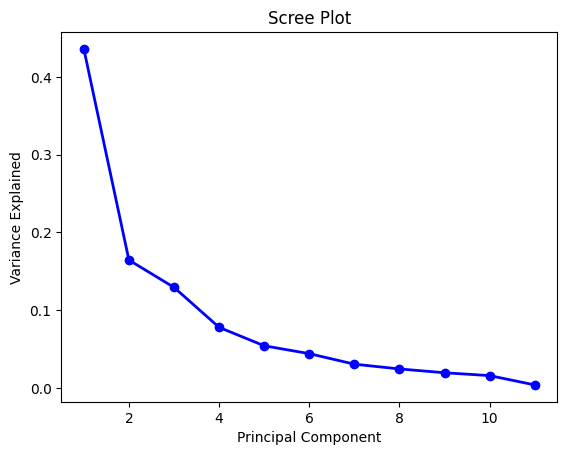

In [27]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

5 principal components explain ~90% of variance. So, let's set the number of components as 5

In [28]:
pca = PCA(n_components = 5)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [29]:
# Let's run a logistic regression on this data
from sklearn.linear_model import LogisticRegression  
  
logit_pca = LogisticRegression(random_state = 0)
logit_pca.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
# Check test accuracy
y_pred_logit_pca = logit_pca.predict(X_test)
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred_logit_pca)

In [31]:
cm

array([[441, 125],
       [120, 414]])

In [32]:
# Test accuracy
sum(cm.diagonal())/cm.sum()

0.7772727272727272

Logistic regression on PCA data gave ~77% accuracy. However, we can't quite understand what the features mean. Let's try logistic regression on the original dataset

In [33]:
# Check logit on normal dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

logit = LogisticRegression(random_state = 0)
logit.fit(X_train, y_train)

y_pred_logit = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred_logit)
print(cm)
print(sum(cm.diagonal())/cm.sum())

[[452 114]
 [117 417]]
0.79


Logistic regression on the original dataset gives a better test accuracy than the dataset on which PCA is applied. Furthermore, the PCA features might be hard to interpret.

In [34]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

# Test accuracy
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7536363636363637

In [35]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Test accuracy
y_pred_dt = rf.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7572727272727273

In [36]:
# kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Test accuracy
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.76

In [37]:
# XGBoost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)

# Test accuracy
y_pred_xgb = xgb.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7554545454545455

In [38]:
# Support Vector Classifier
from sklearn.svm import SVC

svc = SVC(random_state = 0)
svc.fit(X_train, y_train)

# Test accuracy
y_pred_svc = svc.predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.7627272727272727

Logistic regression, Random Forest & SVC have given the best results so far. Let's do hyperparameter tuning on these to see if accuracy improves.

## Hyperparameter tuning

In [39]:
# Logistic regression

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
penalty = ['l1', 'l2', 'elasticnet', 'none']
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
kernel = ['rbf']
param_grid = {'solver': solvers,
               'penalty': penalty,
               'C': c_values} 

logit_model = LogisticRegression(random_state = 0)
grid_search = GridSearchCV(estimator = logit_model, 
                           param_grid = param_grid, 
                           cv = 5,
                           n_jobs = -1,
                          verbose = 3)

In [40]:
# Logistic regression model is run with the best parameters
logit_best = LogisticRegression(C = 10, penalty = 'l2', solver = 'newton-cg')
logit_best.fit(X_train, y_train)

y_pred_logit_best = logit_best.predict(X_test)
accuracy_score(y_test, y_pred_logit_best)

0.7909090909090909

In [41]:
logit_best

LogisticRegression(C=10, solver='newton-cg')

In [42]:
# Random Forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [43]:
# Random Forest model is run with the best parameters
# rf_best = rf_random.best_estimator_
rf_best = RandomForestClassifier(n_estimators = 17788, min_samples_split = 5, min_samples_leaf = 4, \
                                 max_features = 'sqrt', max_depth = 30, bootstrap = True, random_state = 0)

rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)
accuracy_score(y_test, y_pred_rf_best)

0.7681818181818182

In [44]:
# SVC model is run with the best parameters
# svc_best = grid.best_estimator_
svc_best = SVC(C = 0.1, gamma = 1, kernel = 'rbf', random_state = 0)

svc_best.fit(X_train, y_train)
y_pred_svc_best = svc_best.predict(X_test)
accuracy_score(y_test, y_pred_svc_best)

0.7718181818181818

Best model that we've obtained so far is Logistic Regression

In [45]:
# Printing confusion matrix

cm = confusion_matrix(y_test, y_pred_logit_best)
cm

array([[453, 113],
       [117, 417]])

In [46]:
# Check significant features
import statsmodels.api as sm 

log = sm.Logit(y_train, X_train).fit() 
log.summary()

Optimization terminated successfully.
         Current function value: 0.589245
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Choice   No. Observations:                 4400
Model:                          Logit   Df Residuals:                     4389
Method:                           MLE   Df Model:                           10
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.1493
Time:                        18:50:43   Log-Likelihood:                -2592.7
converged:                       True   LL-Null:                       -3047.7
Covariance Type:            nonrobust   LLR p-value:                4.197e-189
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
follower_count_diff        0.4398      0.111      3.973      0.000       0.223       0.657
following_count_diff      -0.5519      0.069     -8.016      0.000      -0.687      -0.417
listed_count_diff          0.8819      0.108      8.150      0.000       0.670       1.094
mentions_received_diff    -0.1495      0.244     -0.614      0.539      -0.627       0.328
retweets_received_diff     0.1703      0.135      1.259      0.208      -0.095       0.435
mentions_sent_diff         0.2555      0.105      2.423      0.015       0.049       0.462
retweets_sent_diff        -0.2398      0.082     -2.912      0.004      -0.401      -0.078
posts_diff                -0.2790      0.100     -2.794      0.005      -0.475      -0.083
network_feature_1_diff     0.7243      0.250      2.901      0.004       0.235       1.214
network_feature_2_diff    -0.1794      0.091     -1.971      0.049      -0.358      -0.001
network_feature_3_diff    -0.0905      0.095     -0.956      0.339      -0.276       0.095
==========================================================================================
"""

Mentions received, retweets received and network feature 3 appear to be insignificant. Other features have p-values < 0.05

In [47]:
importance = logit_best.coef_[0]

# summarize feature importance
importance_df = pd.DataFrame(importance, index = X_train.columns, columns = ['feature_importance'])
importance_df

,feature_importance
follower_count_diff,0.822129
following_count_diff,0.052230
listed_count_diff,0.939492
mentions_received_diff,-0.148011
retweets_received_diff,0.556109
mentions_sent_diff,0.235500
retweets_sent_diff,0.185071
posts_diff,0.080451
network_feature_1_diff,0.669479
network_feature_2_diff,0.542262


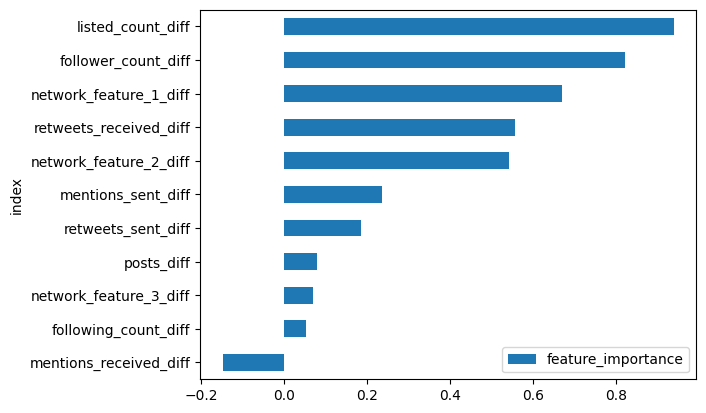

In [48]:
# plot feature importance
importance_df.reset_index().sort_values(by = 'feature_importance').plot('index', 'feature_importance', kind = 'barh')
plt.show()

Most important features as Listed Count, Follower Count & Retweets Received

As marketing campaigns driven by social media influencers are on the rise, it is often a tedious task to find the correct influencer for the job. The above findings can be beneficial to the marketing and analytics team who can leverage these three most important features to find the set of most influential individuals to be reached out to promote their products and drive bigger profits.

## Financial Analysis

In [49]:
#read the file
data = pd.read_csv('train.csv')
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### Profit Without the use of analytics

First, we calculate the profit in the situation without analytics. Here, the retailer offers USD5 to each person (A and B) to tweet once. If an influencer tweets once, there is a 0.01 chance that his/her followers will buy one unit of a product. Retailer has a profit margin of $10 per unit. We calculate the total cost and revenue generated in this case, and thereafter, the profit.

In [50]:
#cost
total_exp= 5*len(data)
revenue=0

#calculate revenue geenrate from each of A and B and sum them up
for i in range(0,len(data)):
    if data['Choice'].iloc[i]==1:
        revenue+= data['A_follower_count'].iloc[i]*0.0001*10
    elif data['Choice'].iloc[i]==0:
        revenue+= data['B_follower_count'].iloc[i]*0.0001*10

In [51]:
#total profit
profit_noanalytics= revenue-total_exp
profit_noanalytics

5349068.592999984

### Profit using Predictions from the model

With analytics, the retailer offers $10 to those identified as influencers by the model to send two tweets each.f an influencer tweets twice, the overall buying probability will be 0.015 percent. Now, in this case we will only generate revenue in the cases where the predicted choice is the same as the actual choice. Otherwise, for that data point we will only incur a cost of 10 USD.

In [52]:
#get predicted choice from our best model
data['pred_choice']=logit_best.predict(X)

In [53]:
total_exp= 10*len(data)
revenue=0

#calculate revenue geenrate from each of A and B and sum them up
for i in range(0,len(data)):
    if (data['Choice'].iloc[i]==1) and (data['Choice'].iloc[i]==data['pred_choice'].iloc[i]):
        revenue+= data['A_follower_count'].iloc[i]*0.00015*10
    elif (data['Choice'].iloc[i]==0) and (data['Choice'].iloc[i]==data['pred_choice'].iloc[i]):
        revenue+= data['B_follower_count'].iloc[i]*0.00015*10
        
profit_case2= revenue - total_exp

### Profit using the Perfect Model

Perfect model means that every predicted choice matches the actual choice. So profit is generated from every single row of the data

In [54]:
total_exp= 10*len(data)
revenue=0

#calculate revenue geenrate from each of A and B and sum them up
for i in range(0,len(data)):
    if (data['Choice'].iloc[i]==1):
        revenue+= data['A_follower_count'].iloc[i]*0.00015*10
    elif (data['Choice'].iloc[i]==0):
        revenue+= data['B_follower_count'].iloc[i]*0.00015*10
        
profit_case3= revenue - total_exp

### Summary:

In [55]:
print('Net Profit generated without analytics: $', profit_noanalytics)
print('Net Profit generated with analytics: $', profit_case2)
print('Difference in Net Profit generated with and without analytics: $', profit_case2-profit_noanalytics)

Net Profit generated without analytics: $ 5349068.592999984
Net Profit generated with analytics: $ 7440543.786500008
Difference in Net Profit generated with and without analytics: $ 2091475.1935000243


In [56]:
print('Lift in Net Profit using the analytical model: ', round(profit_case2/profit_noanalytics,2))
print('Lift in Net Profit using the perfect analytical model: ', round(profit_case3/profit_noanalytics,2))

Lift in Net Profit using the analytical model:  1.39
Lift in Net Profit using the perfect analytical model:  1.5


From the results above, we can clearly observe that we can generate an additional 2.1M USD with the help of our model to predict choice of influencer. It gives us a lift of 1.39 against the archaic way of not using analytics. Furthermore, if we could have built a perfect analytical model which does not mis-predict any target value of choice, we could have achieved an even higher lift of 1.5